<a href="https://colab.research.google.com/github/Krit03W/Machine-Learning/blob/main/HW2_Regression_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualize Distribution**

ดูการกระจายตัวของข้อมูล

In [26]:
from google.colab import files
uploaded = files.upload()  # อัฟโหลด dataset

Saving support2_dataset.xlsx to support2_dataset.xlsx


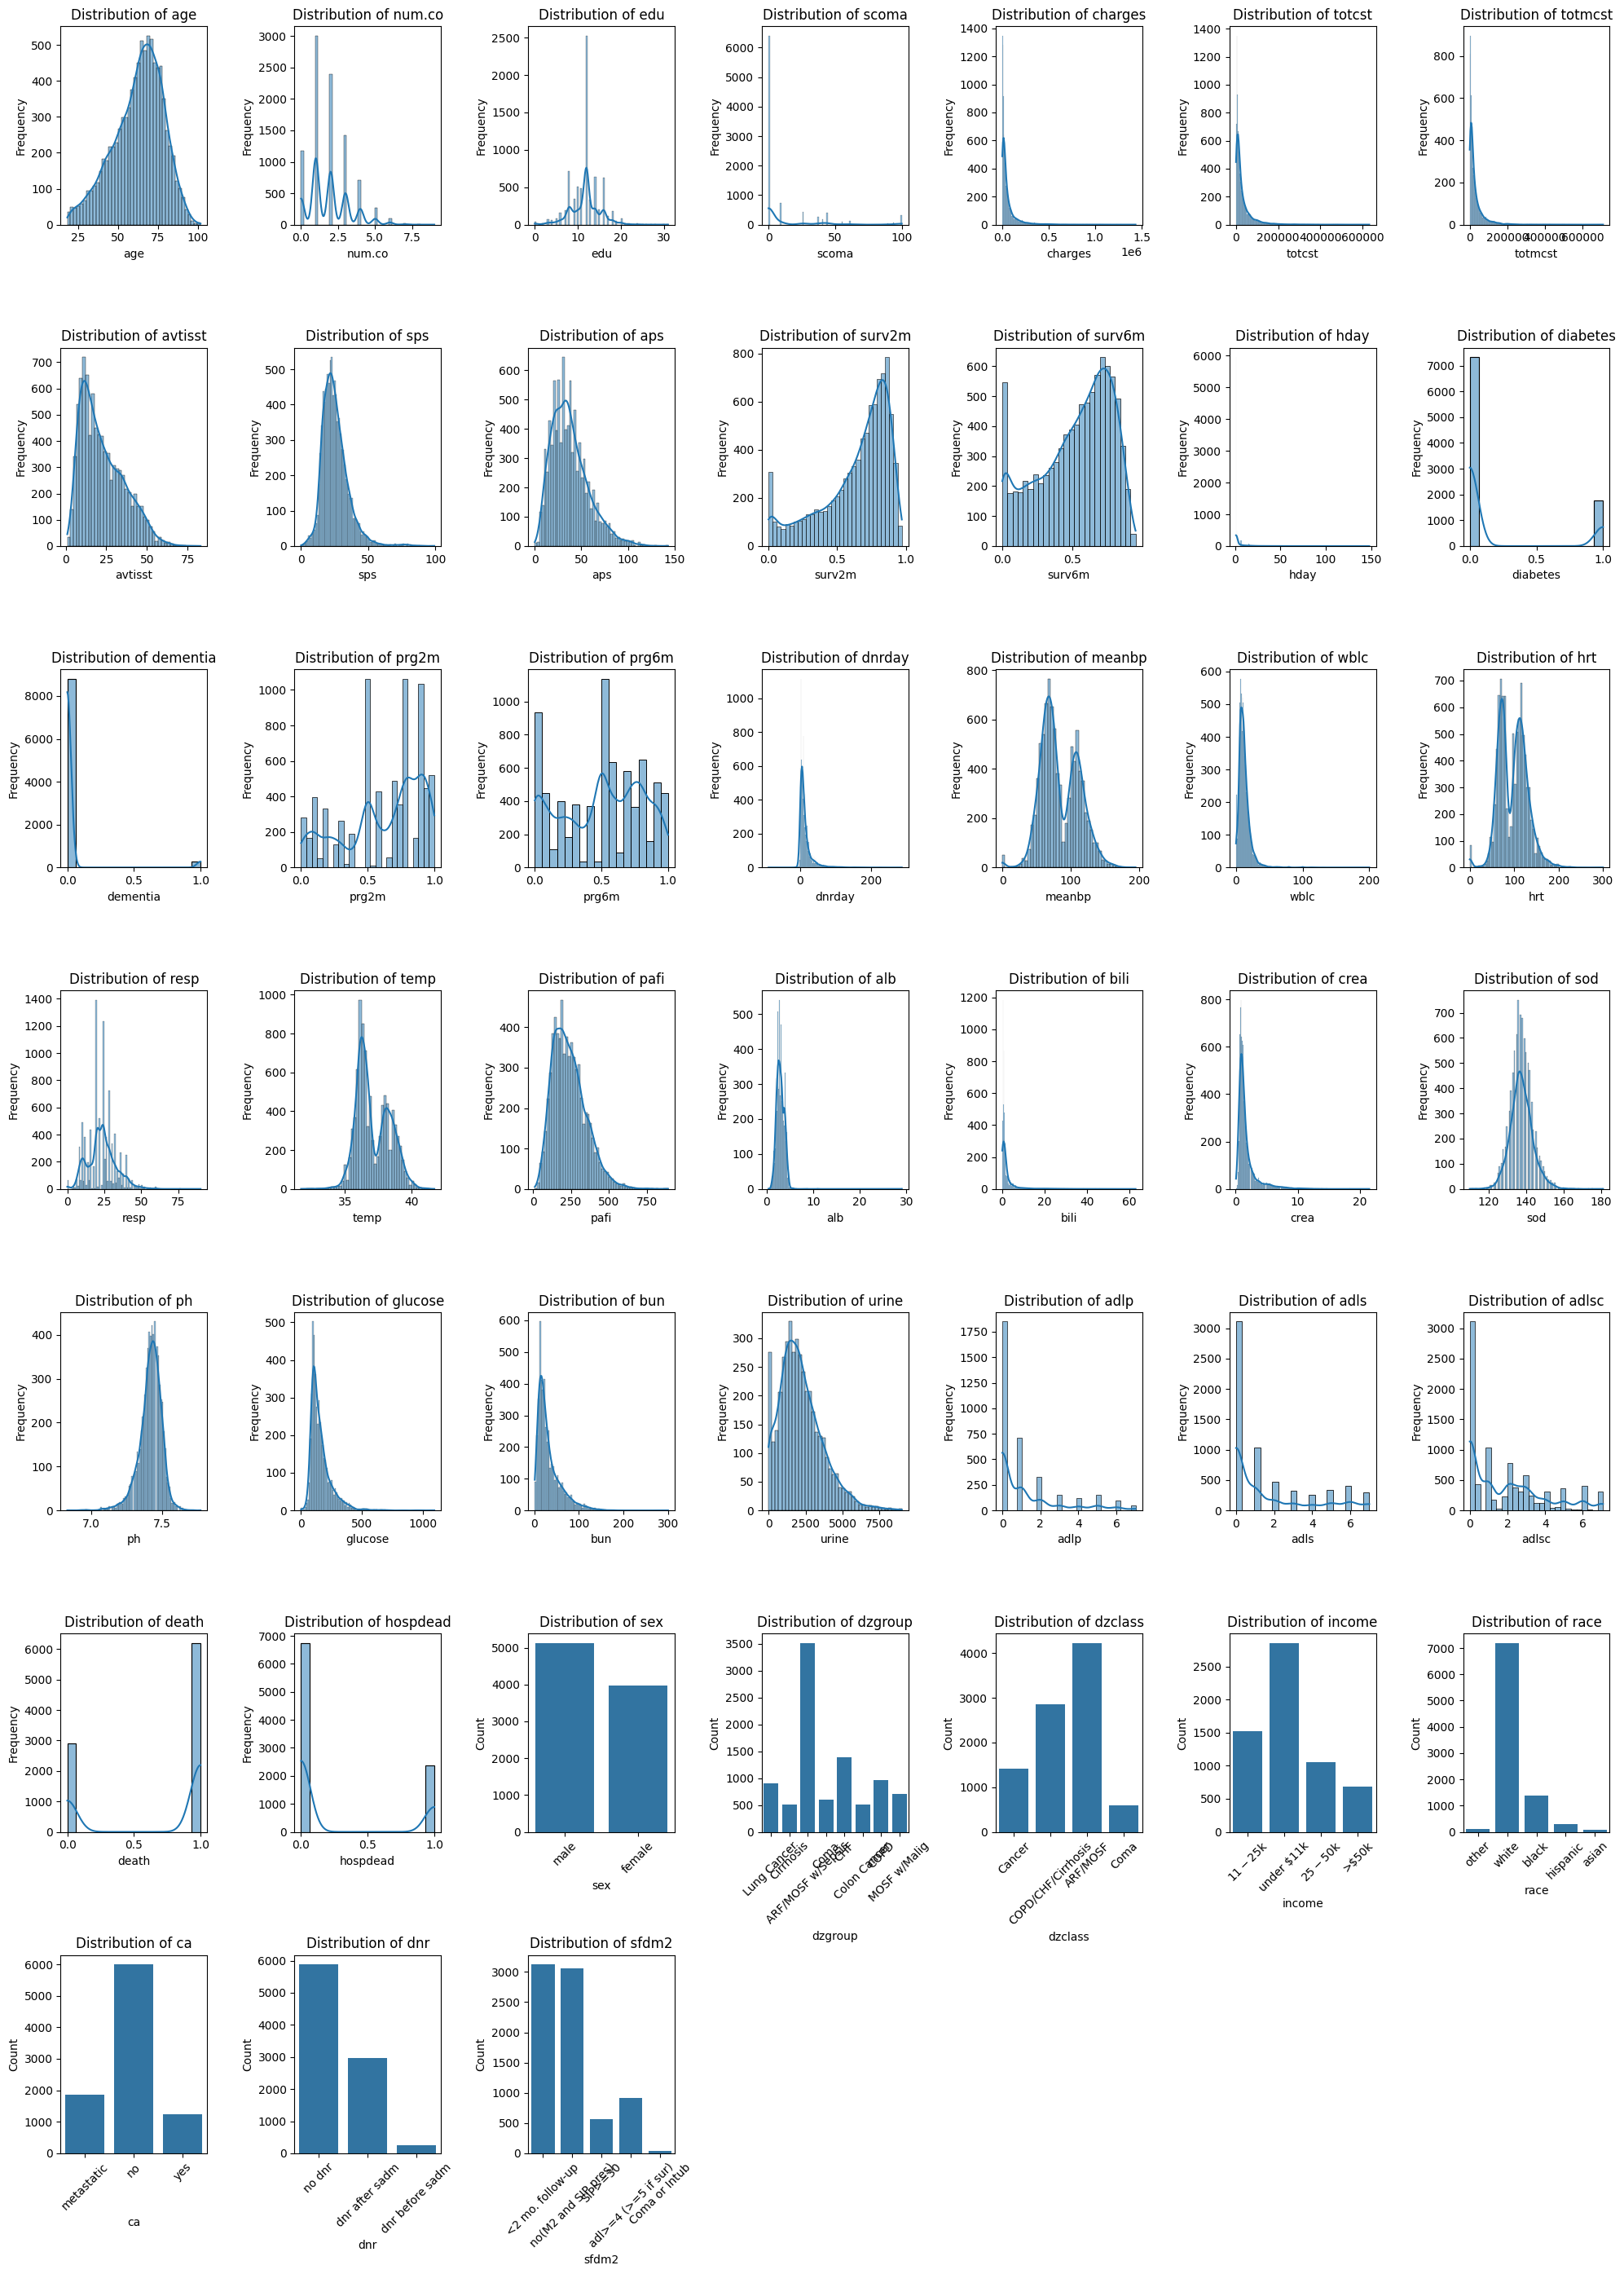

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

df = pd.read_excel('support2_dataset.xlsx')

# คัดแยกประเภทของตัวแปรเชิงตัวเลขและเชิงหมวดหมู่
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# รวมตัวแปรเชิงตัวเลขและเชิงหมวดหมู่เข้าด้วยกัน
all_features = list(numerical_features) + list(categorical_features)

# กำหนดจำนวนแถวและคอลัมน์สำหรับ subplots
num_cols = 7
num_rows = (len(all_features) + num_cols - 1) // num_cols  # คำนวณจำนวนแถว

# กำหนดขนาดของกราฟ
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Plot กราฟการกระจายตัวของทุกตัวแปร
for i, feature in enumerate(all_features):
    row = i // num_cols
    col = i % num_cols

    if feature in numerical_features:
        sns.histplot(df[feature].dropna(), kde=True, ax=axes[row, col])  # ใช้ histogram สำหรับข้อมูลเชิงตัวเลข
    else:
        sns.countplot(data=df, x=feature, ax=axes[row, col])  # ใช้ countplot สำหรับข้อมูลเชิงหมวดหมู่
        axes[row, col].tick_params(axis='x', rotation=45)  # หมุนชื่อของค่าในแกน x

    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency' if feature in numerical_features else 'Count')

# ลบช่องว่างที่เหลือ (ถ้ามี)
for i in range(len(all_features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# ปรับช่องว่างระหว่าง subplots
plt.tight_layout()
plt.show()

# **Defining Target Variable**

  กำหนดให้ Target คือ 'adlsc'

  *   adlsc : Activity of Daily Living Scores.

In [28]:
# กำหนด target และดูข้อมูลเบื้องต้น
target = 'adlsc'

# ดูข้อมูลเบื้องต้น
print(df[target].describe())  # สรุปค่าทางสถิติ
print(df[target].isnull().sum())  # ตรวจสอบจำนวนค่าที่หายไปใน target


count    9105.000000
mean        1.888272
std         2.003763
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.073242
Name: adlsc, dtype: float64
0


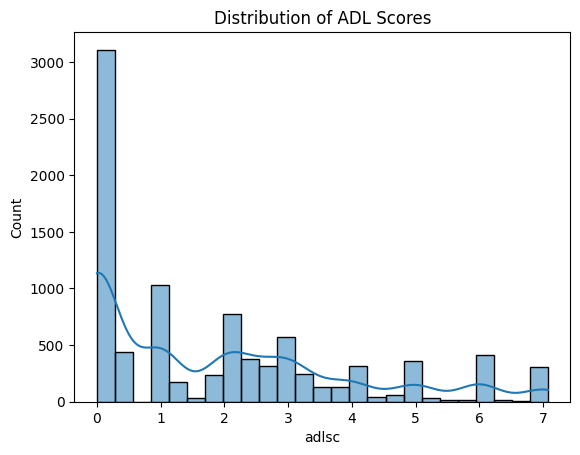

Skewness of adlsc: 0.9377151934462848


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# ดูการกระจายตัวของเป้าหมาย (adlsc)
sns.histplot(df[target], kde=True)
plt.title('Distribution of ADL Scores')
plt.show()

# ตรวจสอบ Skewness ของ target
skewness = df[target].skew()
print(f'Skewness of {target}: {skewness}')

# หาก Skewness สูงมาก อาจต้องพิจารณาทำการปรับค่าการกระจาย


In [30]:
import numpy as np
# ตรวจสอบข้อมูลเบื้องต้นและประเภทของข้อมูลในแต่ละคอลัมน์
print(df.info())

# ตรวจสอบว่าคอลัมน์ไหนเป็นเชิงตัวเลขและเชิงหมวดหมู่
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object, 'category']).columns.tolist() # Changed np.object to object

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

# Check if 'ID' column exists before dropping
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])  # ตัวอย่างการลบคอลัมน์ที่ไม่จำเป็น
else:
    print("Column 'ID' not found in the DataFrame.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

# **Categorical data**

Feature Selection : Categorical data

Box Plot : หาความเกี่ยวข้องของข้อมูลระหว่าง Target และ Feature

Value counts for sex:
sex
male      5125
female    3980
Name: count, dtype: int64


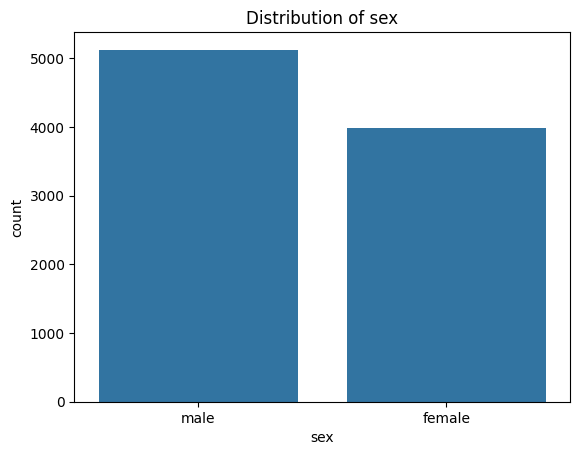

Value counts for dzgroup:
dzgroup
ARF/MOSF w/Sepsis    3515
CHF                  1387
COPD                  967
Lung Cancer           908
MOSF w/Malig          712
Coma                  596
Colon Cancer          512
Cirrhosis             508
Name: count, dtype: int64


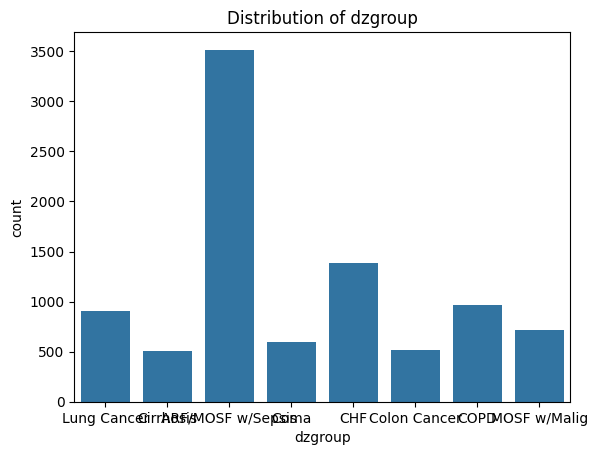

Value counts for dzclass:
dzclass
ARF/MOSF              4227
COPD/CHF/Cirrhosis    2862
Cancer                1420
Coma                   596
Name: count, dtype: int64


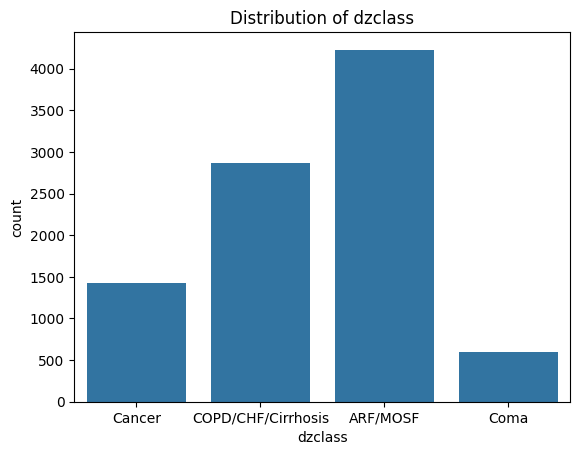

Value counts for income:
income
under $11k    2855
$11-$25k      1527
$25-$50k      1057
>$50k          684
Name: count, dtype: int64


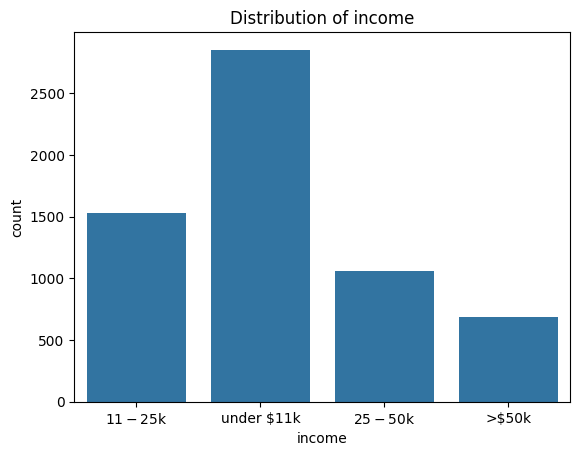

Value counts for race:
race
white       7191
black       1391
hispanic     290
other        112
asian         79
Name: count, dtype: int64


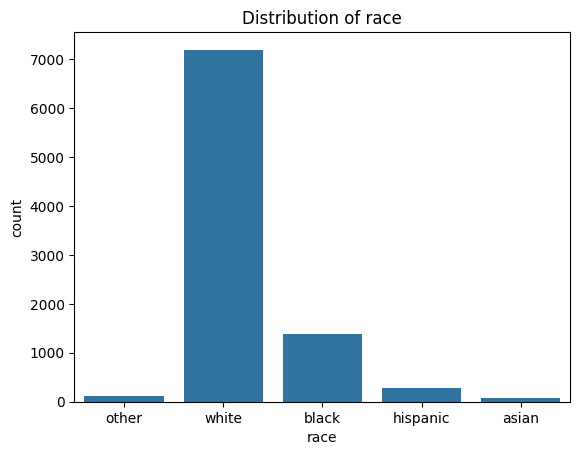

Value counts for ca:
ca
no            5995
metastatic    1858
yes           1252
Name: count, dtype: int64


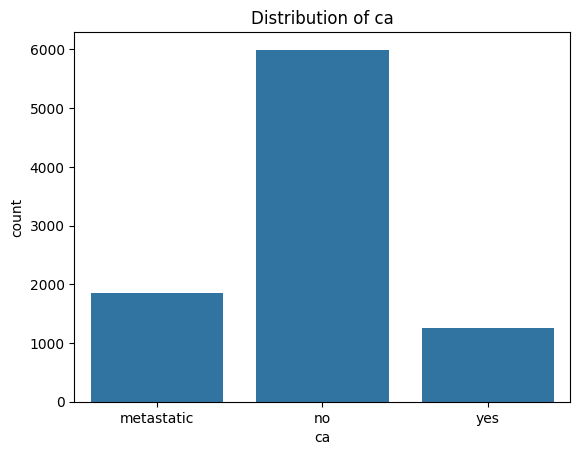

Value counts for dnr:
dnr
no dnr             5880
dnr after sadm     2956
dnr before sadm     239
Name: count, dtype: int64


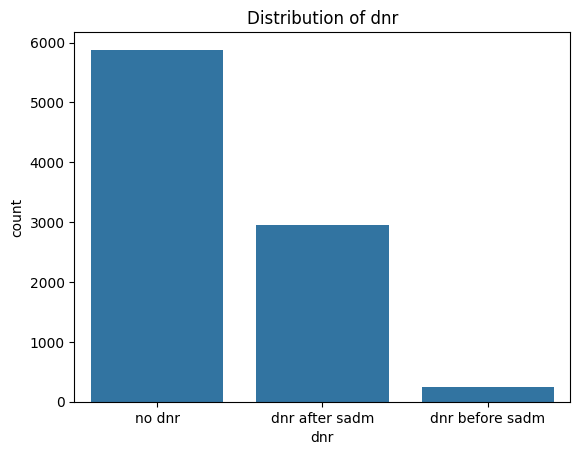

Value counts for sfdm2:
sfdm2
<2 mo. follow-up       3123
no(M2 and SIP pres)    3061
adl>=4 (>=5 if sur)     916
SIP>=30                 564
Coma or Intub            41
Name: count, dtype: int64


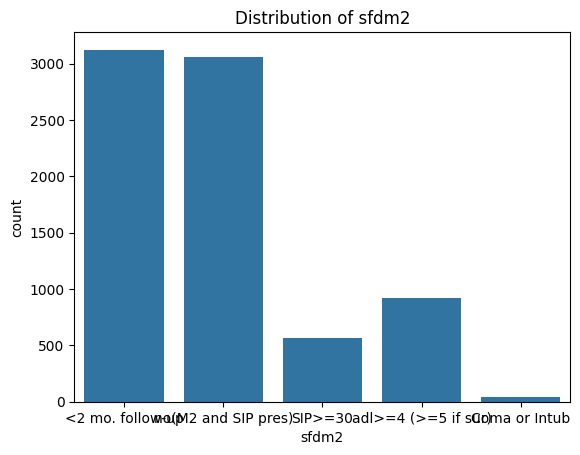

In [31]:
# ตรวจสอบคอลัมน์เชิงหมวดหมู่
for col in categorical_columns:
    print(f'Value counts for {col}:')
    print(df[col].value_counts())

    # การสร้างกราฟแสดงการกระจายของค่าหมวดหมู่
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


# **Numerical Data**

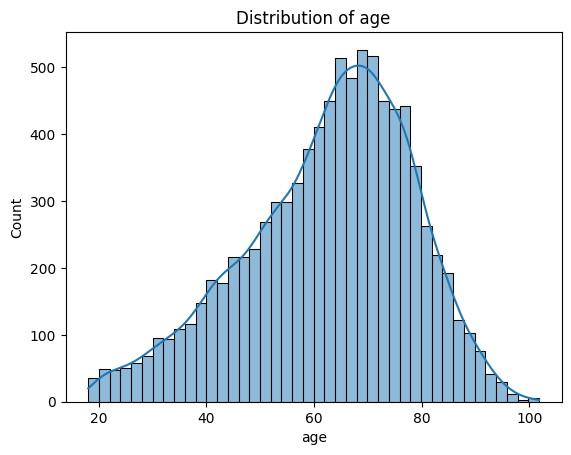

Skewness of age: -0.5021163950926848


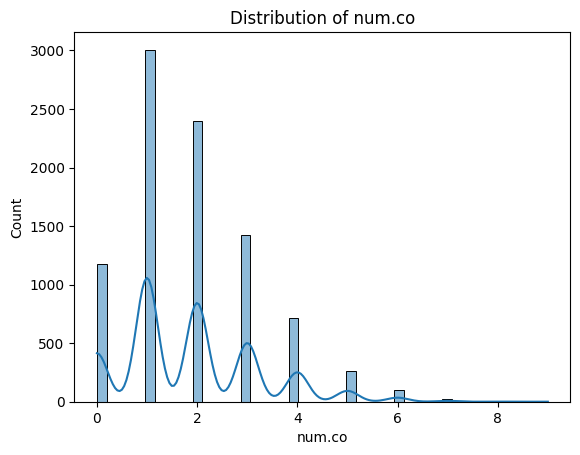

Skewness of num.co: 0.8232940126977268


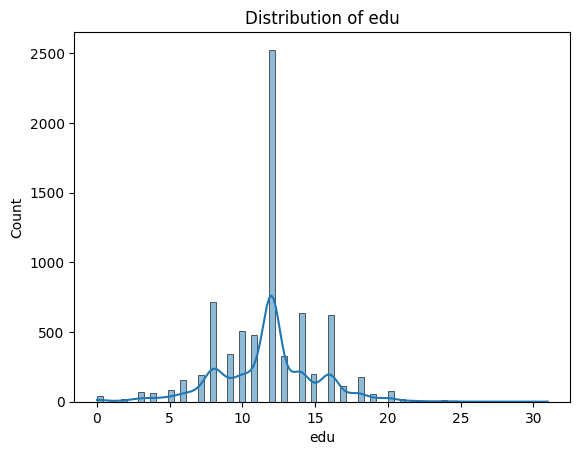

Skewness of edu: -0.0582672760816167


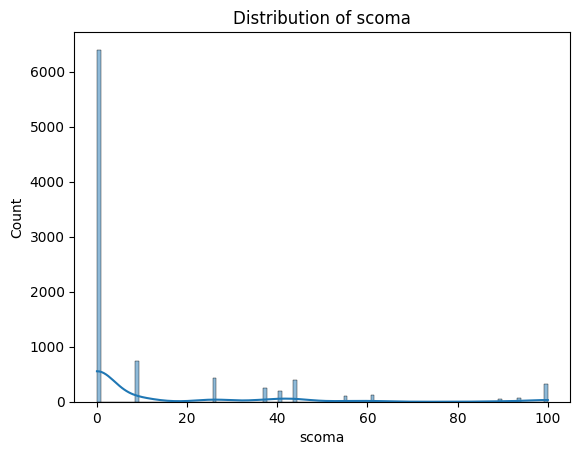

Skewness of scoma: 2.3335850655762775


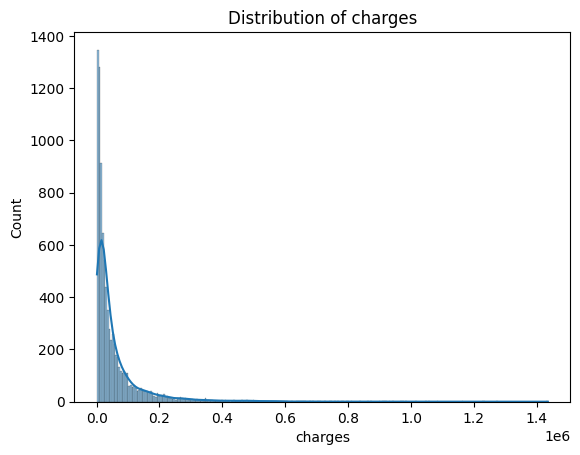

Skewness of charges: 4.6871442494290925


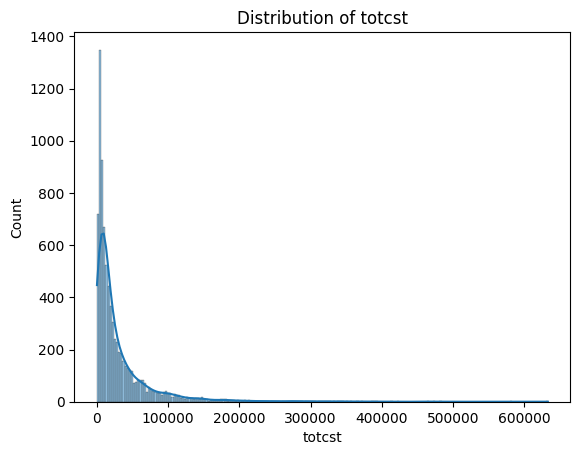

Skewness of totcst: 3.9552302858447295


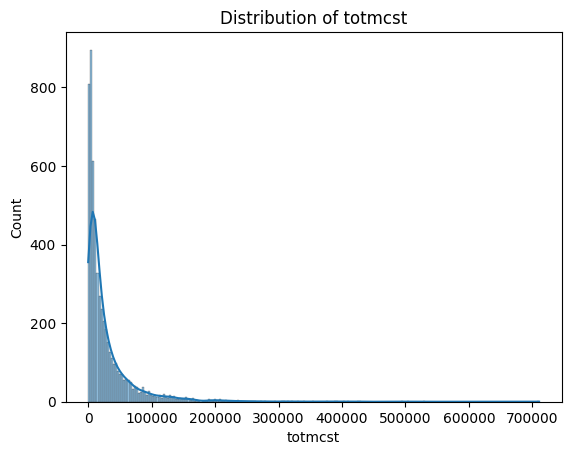

Skewness of totmcst: 4.3636999982076885


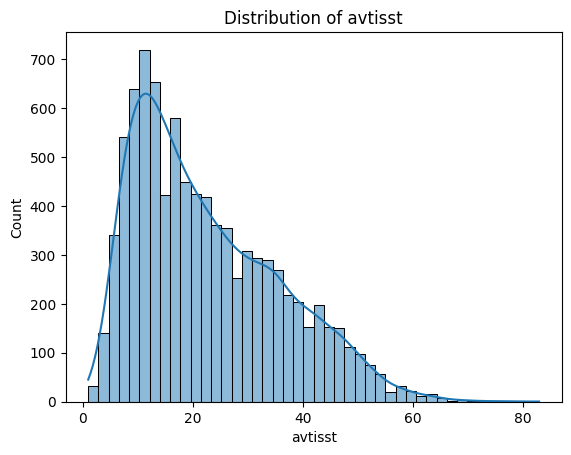

Skewness of avtisst: 0.7663448992325876


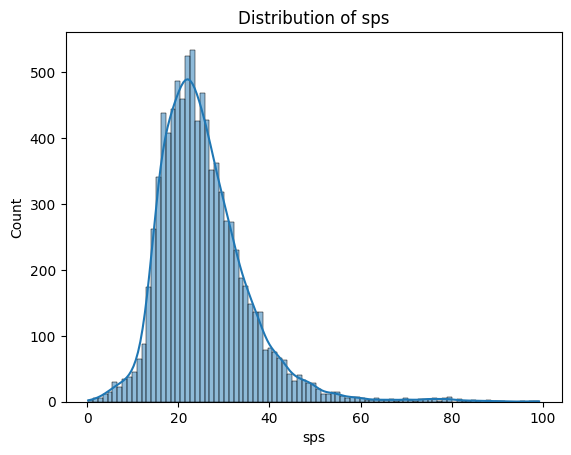

Skewness of sps: 1.6046617563142853


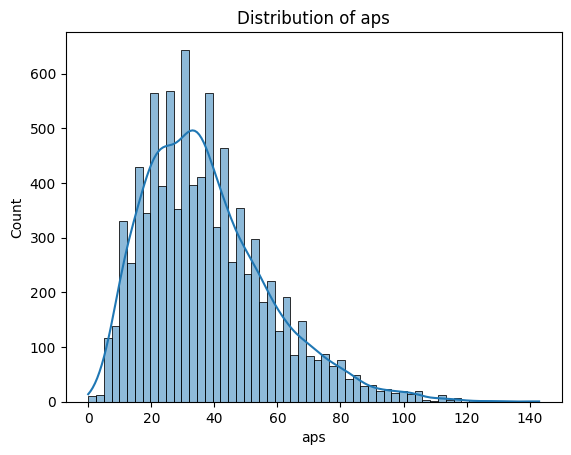

Skewness of aps: 0.944985579454458


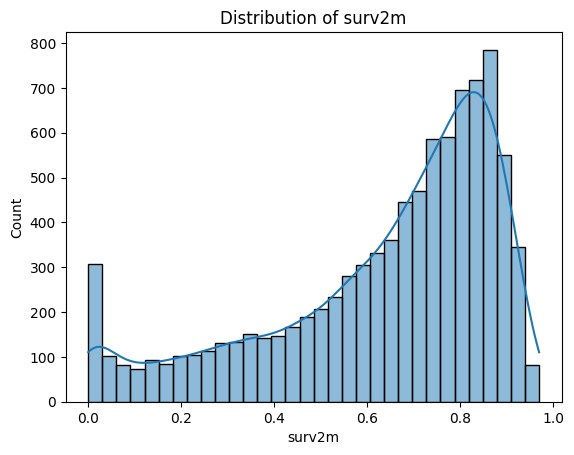

Skewness of surv2m: -1.0411186168258446


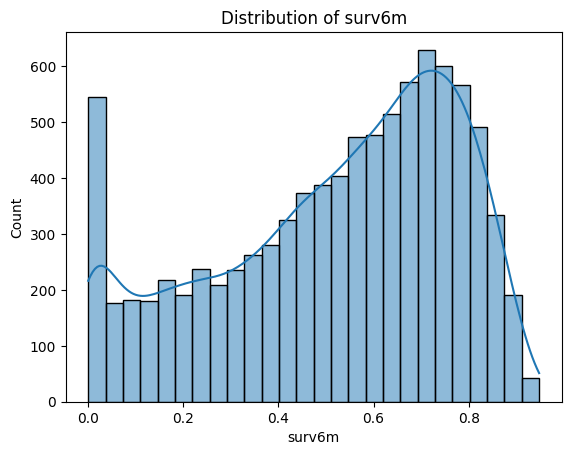

Skewness of surv6m: -0.550284073599607


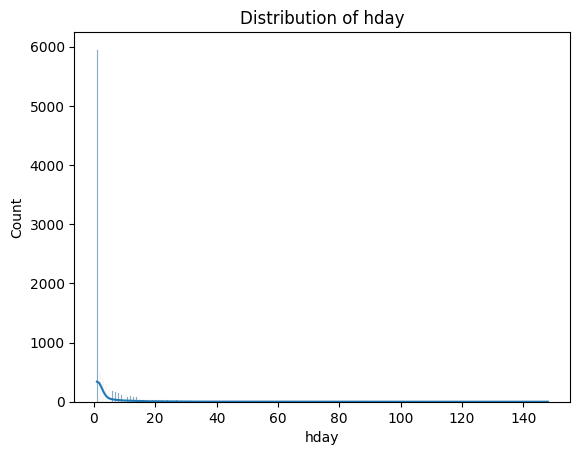

Skewness of hday: 5.850332938953031


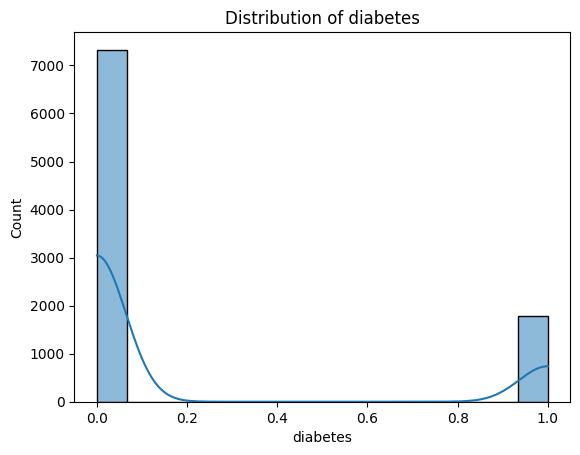

Skewness of diabetes: 1.537649345041555


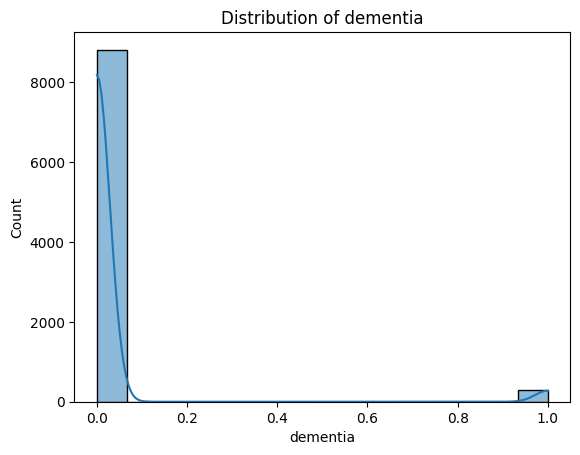

Skewness of dementia: 5.272845299712482


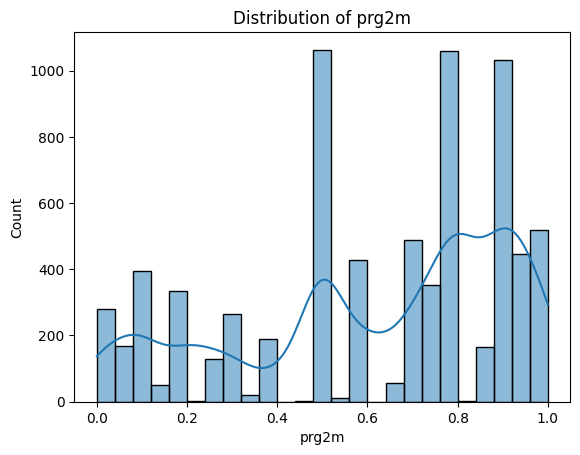

Skewness of prg2m: -0.6275741627713302


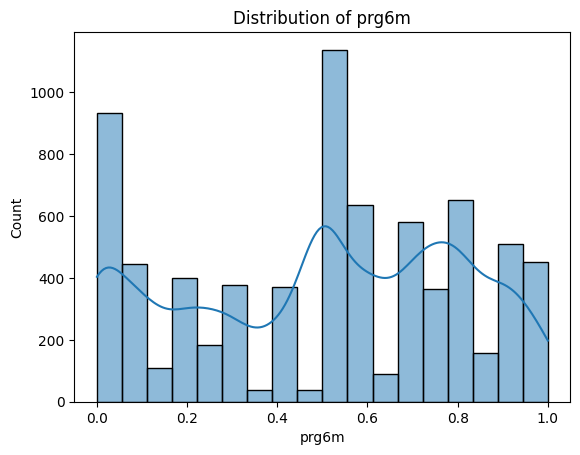

Skewness of prg6m: -0.19990915583894864


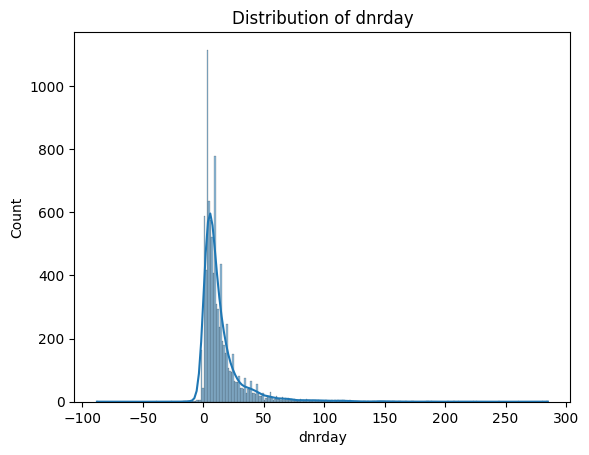

Skewness of dnrday: 4.269235370133604


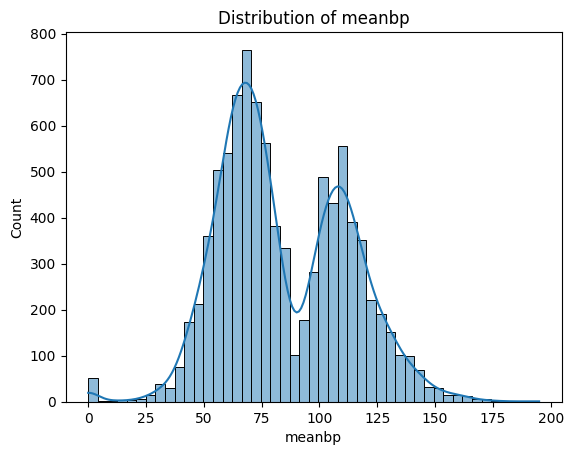

Skewness of meanbp: 0.25505926212640423


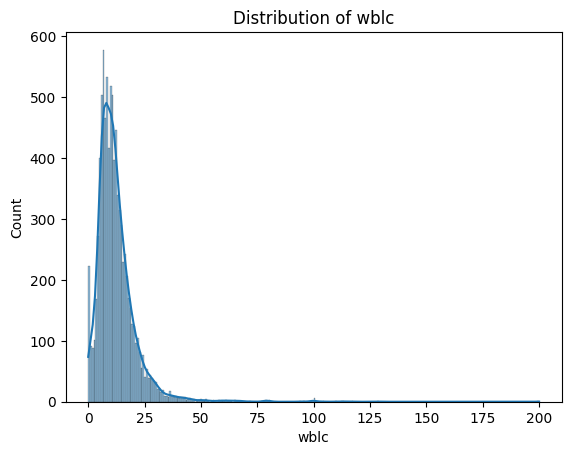

Skewness of wblc: 4.260828887915123


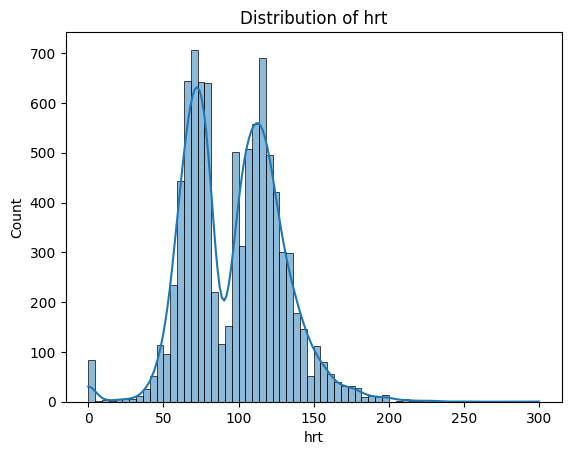

Skewness of hrt: 0.2059781507030539


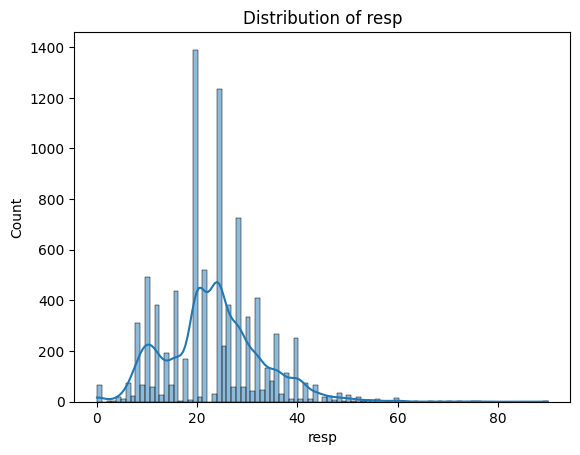

Skewness of resp: 0.483780574293638


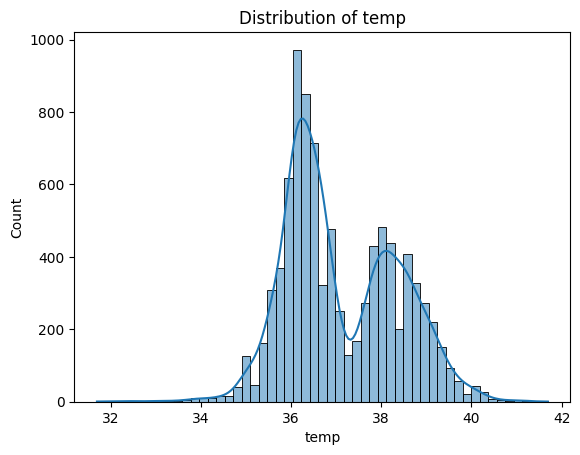

Skewness of temp: 0.313185382861428


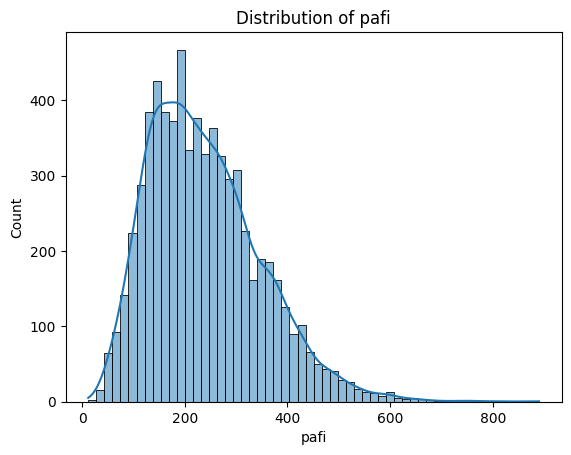

Skewness of pafi: 0.8356119345961325


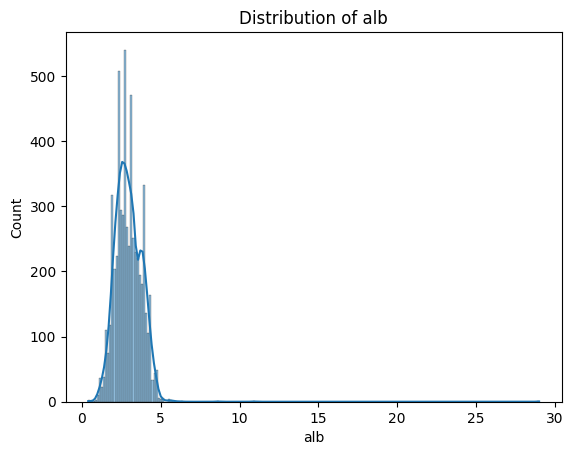

Skewness of alb: 4.894392985928472


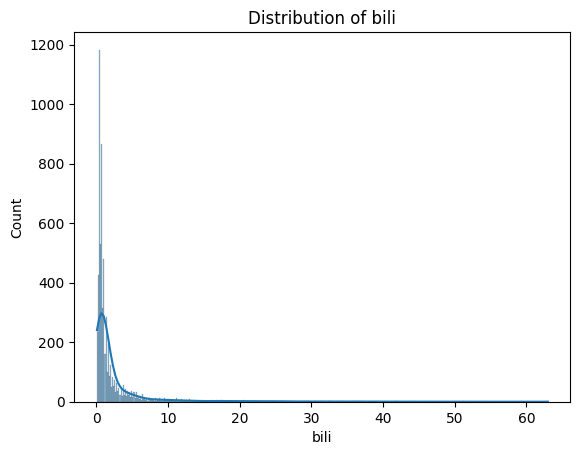

Skewness of bili: 4.817304545049086


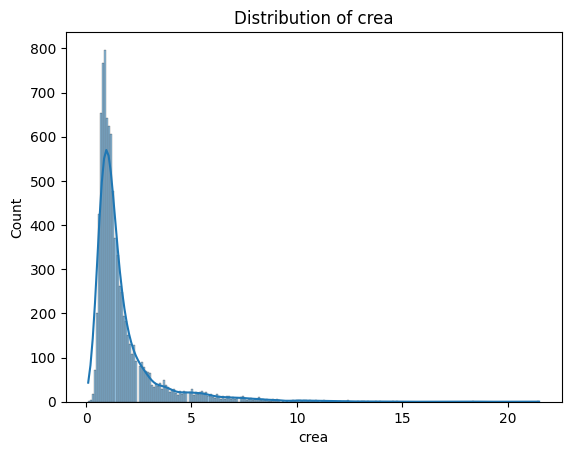

Skewness of crea: 3.22509226951304


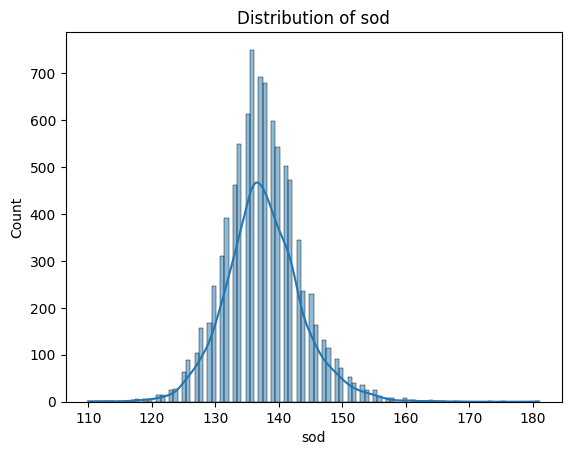

Skewness of sod: 0.3573931212702985


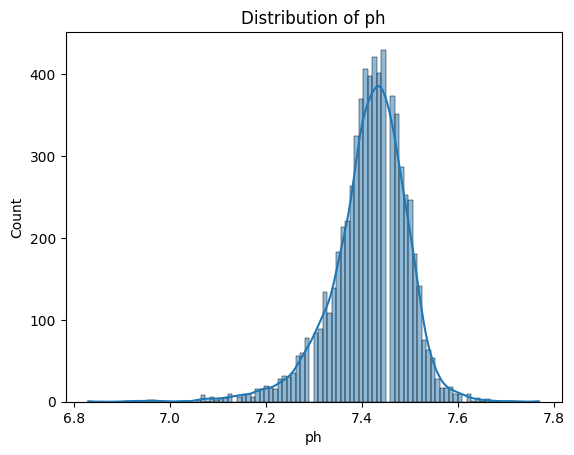

Skewness of ph: -1.028937993023364


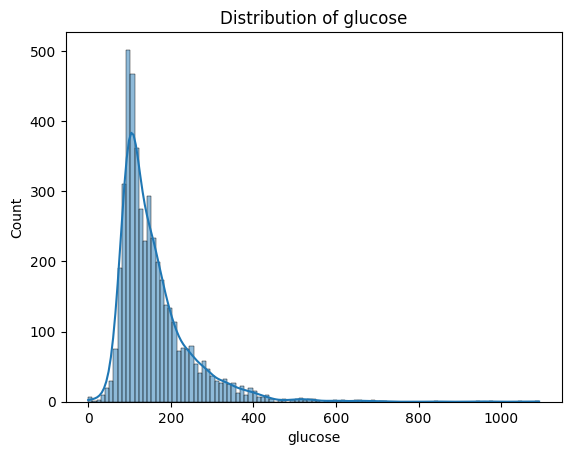

Skewness of glucose: 2.5779633405466065


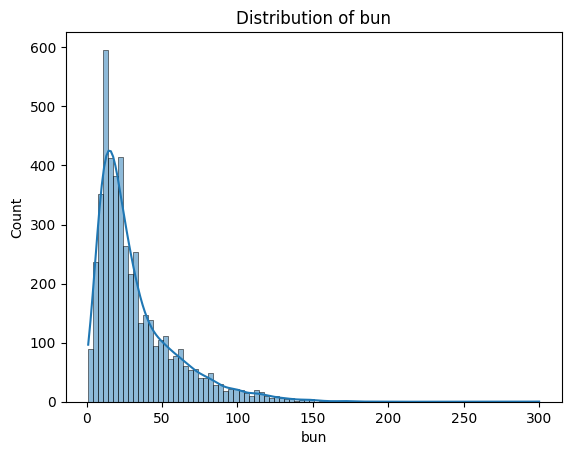

Skewness of bun: 1.8803816363046506


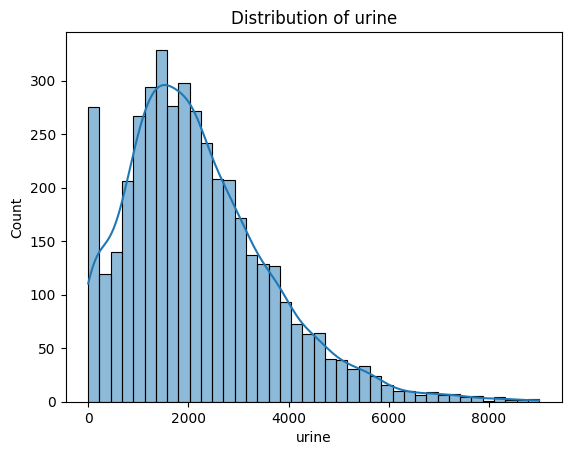

Skewness of urine: 0.9720198109272468


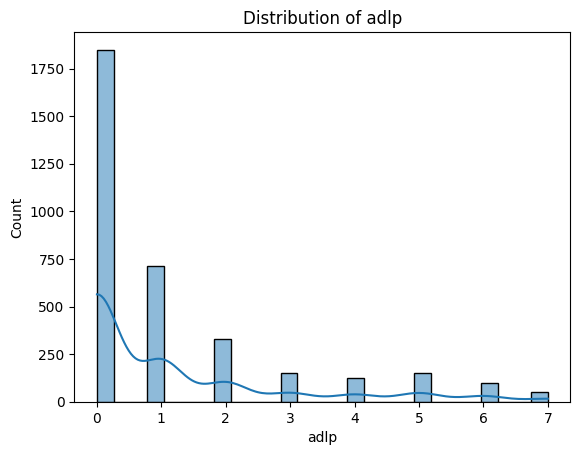

Skewness of adlp: 1.6932191775268426


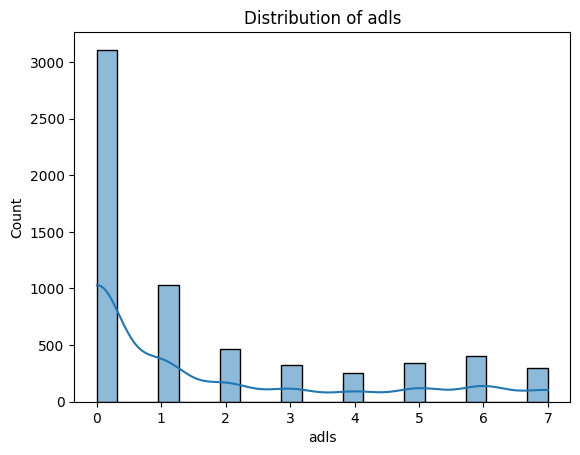

Skewness of adls: 1.20163729335868


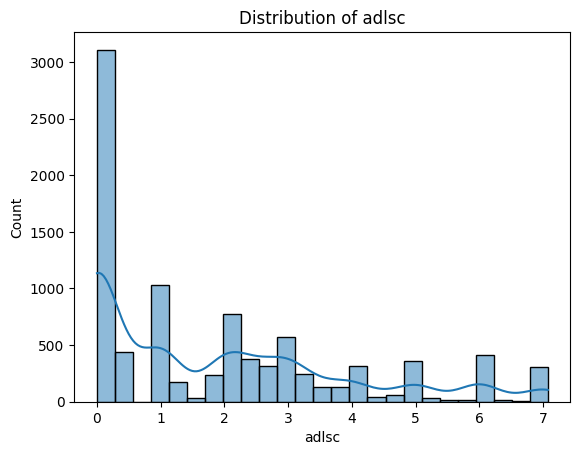

Skewness of adlsc: 0.9377151934462848


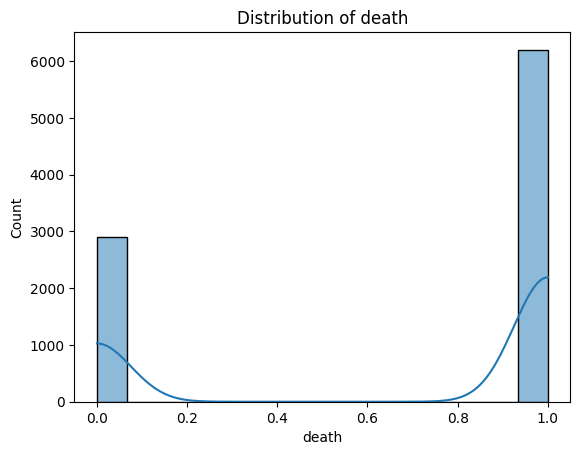

Skewness of death: -0.7770721286038315


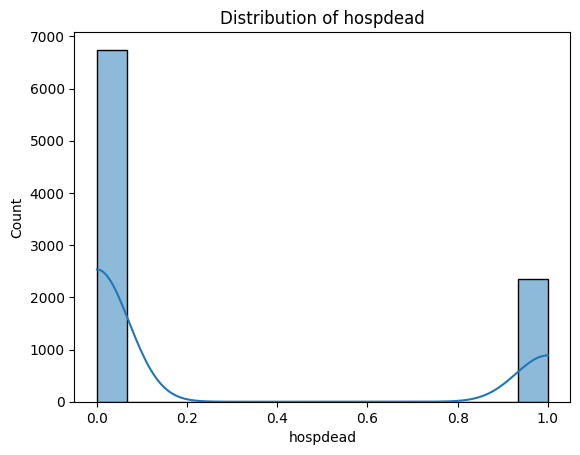

Skewness of hospdead: 1.0992441829551782


In [32]:
# สร้าง Histogram สำหรับฟีเจอร์เชิงตัวเลข
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # ตรวจสอบ skewness ของแต่ละตัวแปร
    print(f'Skewness of {col}: {df[col].skew()}')


# Missing Values treatment

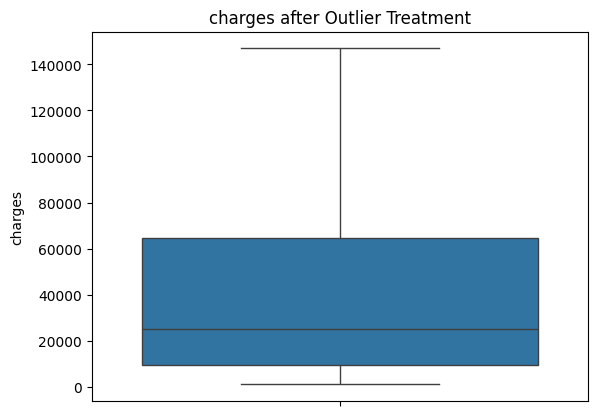

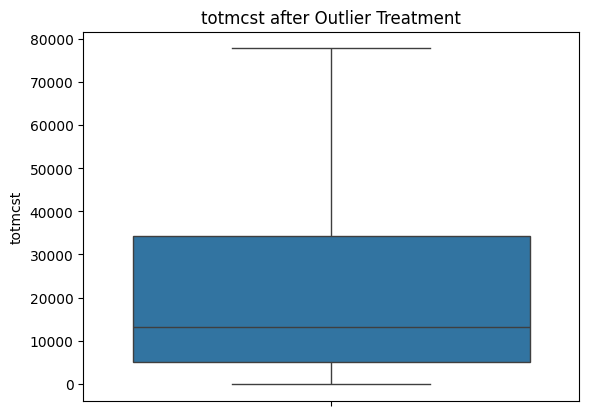

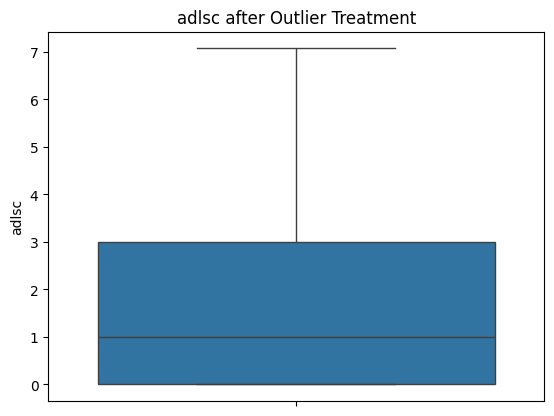

In [33]:
# ฟังก์ชันสำหรับจัดการ outliers โดยใช้ IQR method
def cap_outliers(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# ใช้ฟังก์ชันเพื่อจัดการ outliers ในตัวแปรที่เลือก
for col in ['charges', 'totmcst', 'adlsc']:
    df = cap_outliers(df, col, factor=1.5)

# ดูการกระจายตัวของแต่ละตัวแปรหลังจากจัดการ outliers
for col in ['charges', 'totmcst', 'adlsc']:
    sns.boxplot(df[col])
    plt.title(f'{col} after Outlier Treatment')
    plt.show()


In [34]:
# ตรวจสอบจำนวนค่าที่หายไปในแต่ละคอลัมน์
print(df.isnull().sum())

# เติมค่าที่หายไปสำหรับตัวแปรเชิงตัวเลขด้วย Mean, Median
df['charges'] = df['charges'].fillna(df['charges'].mean())
df['totmcst'] = df['totmcst'].fillna(df['totmcst'].median())

# เติมค่าที่หายไปสำหรับตัวแปรเชิงหมวดหมู่ด้วย Mode
df['income'] = df['income'].fillna(df['income'].mode()[0])

# ตรวจสอบว่าการเติมค่าที่หายไปทำได้สำเร็จแล้วหรือไม่
print(df.isnull().sum())


age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
death          0
hospdead       0
sfdm2       1400
dtype: int64
age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income         0
scoma          1
charges        0
totcst       888
totmcst        0
avtisst       82
race          42
s

# Feature selection

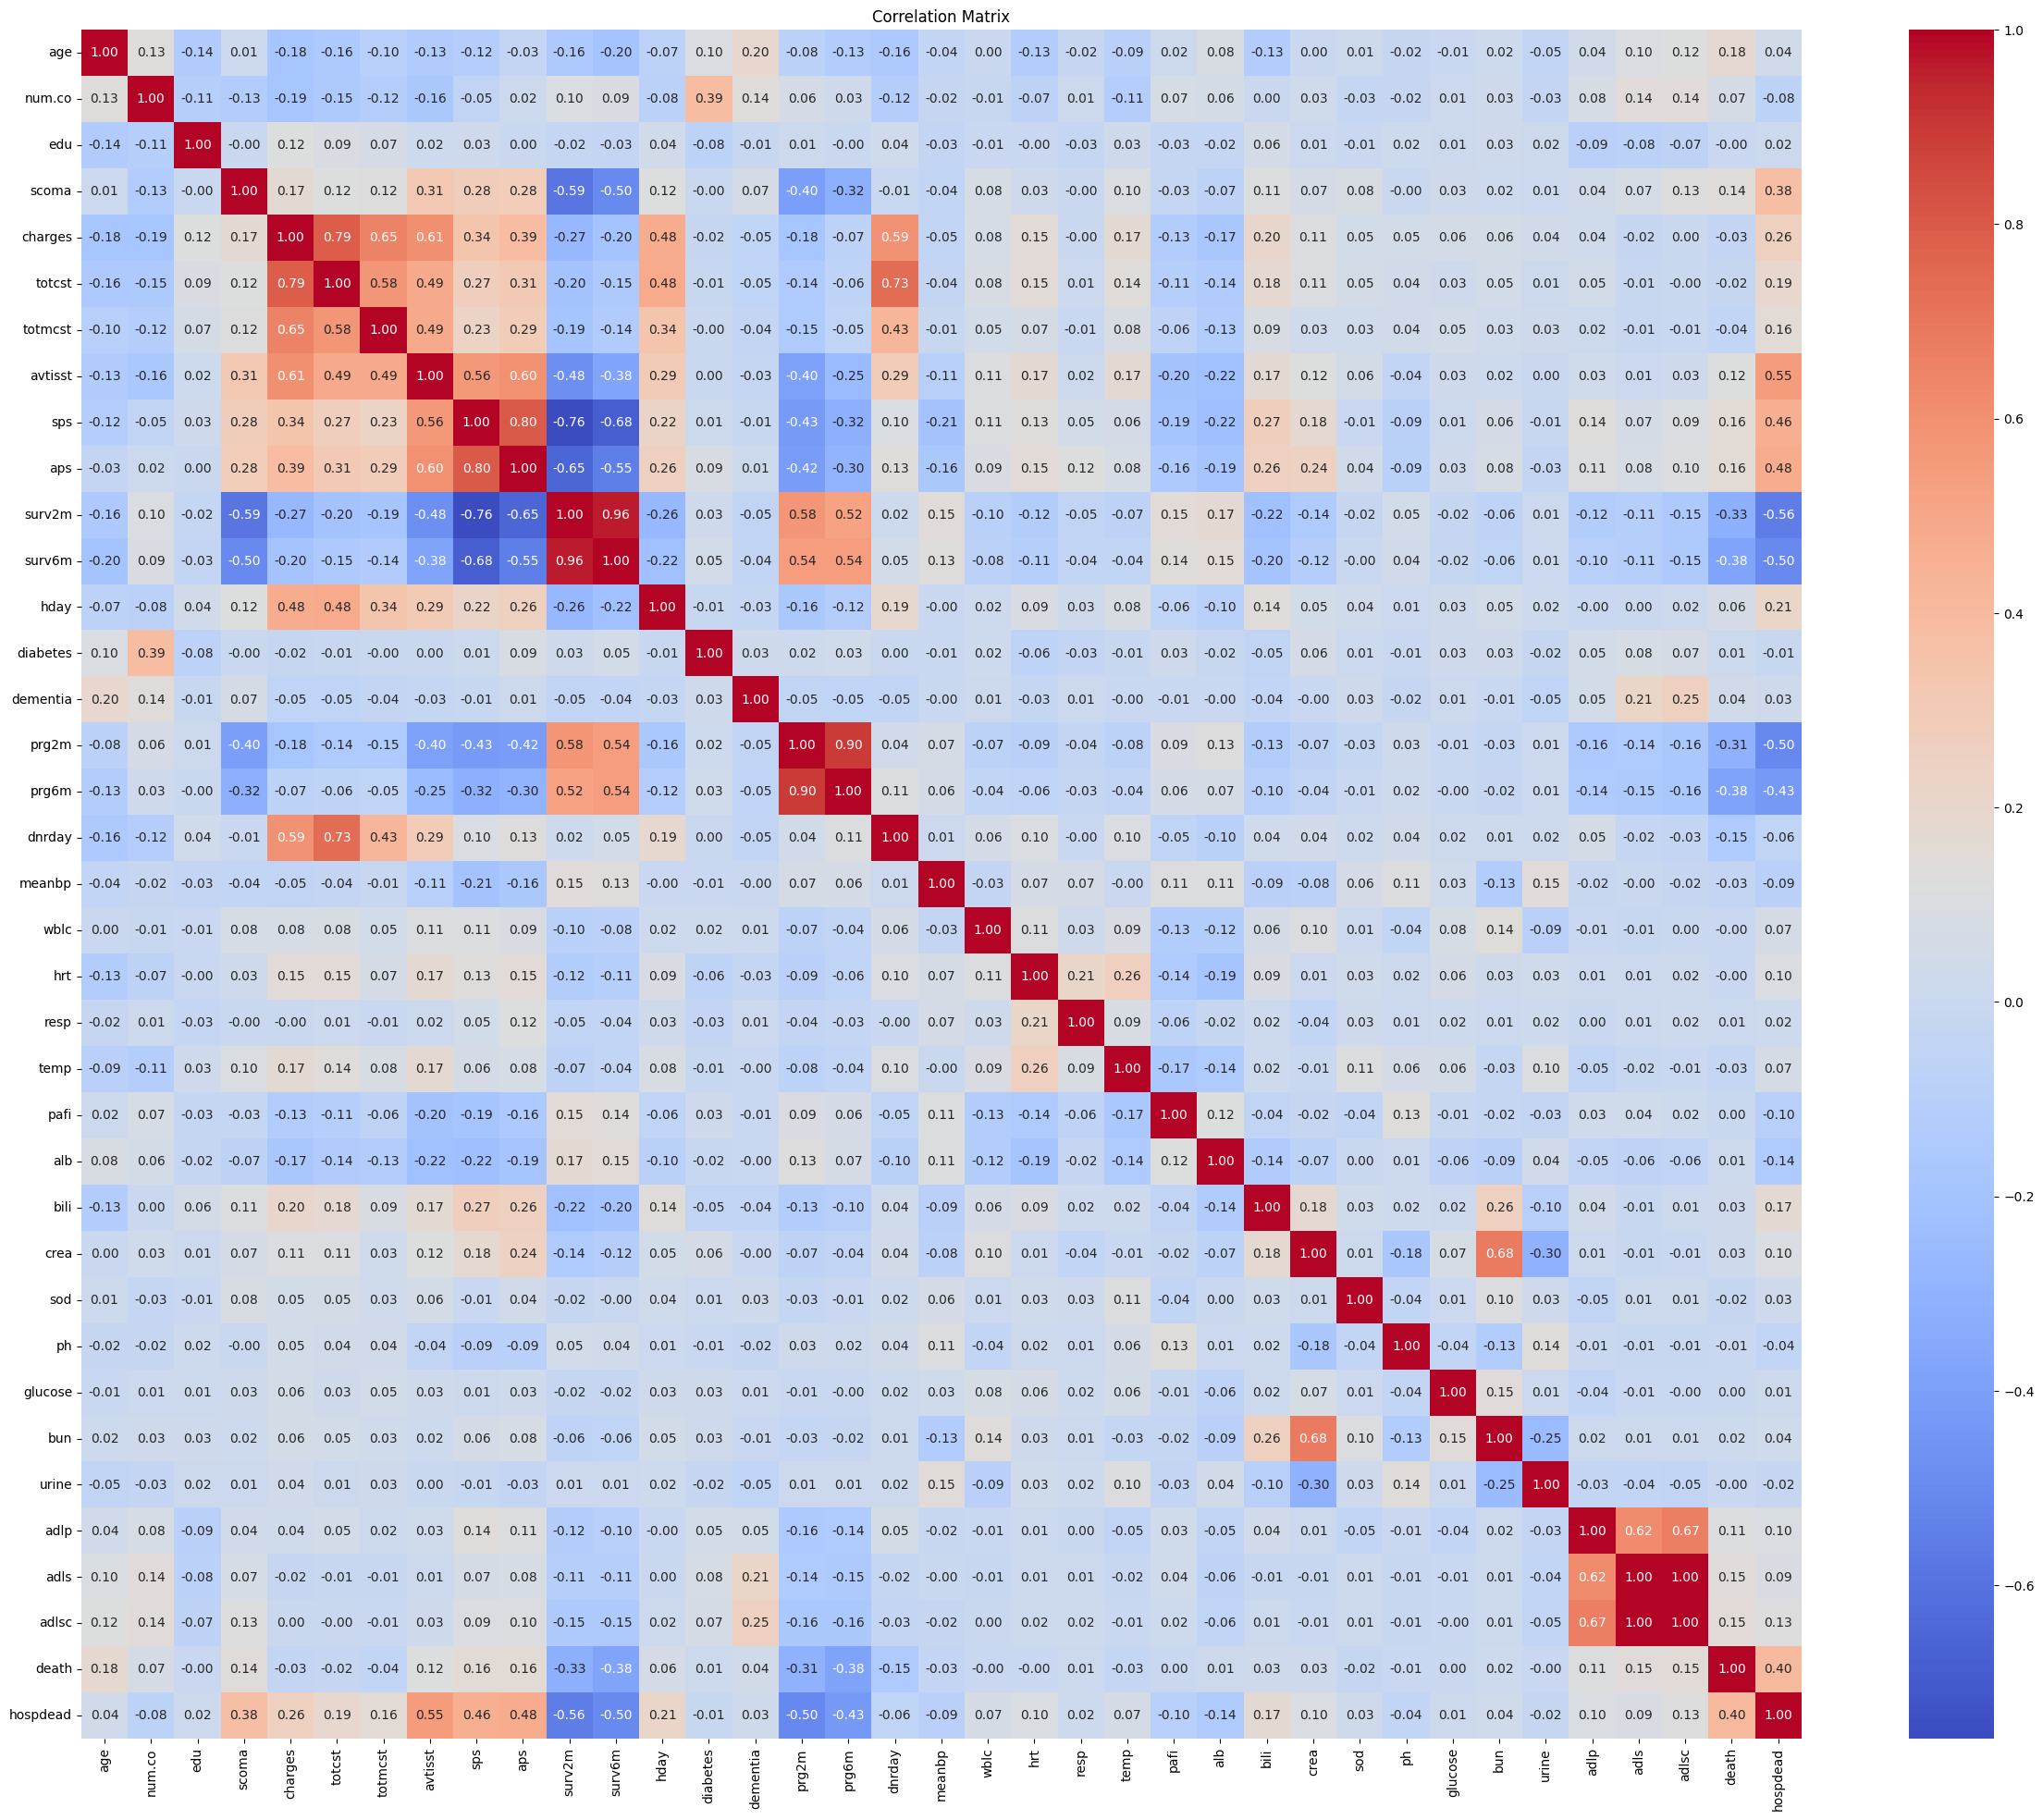

In [35]:
# แสดง Correlation Matrix ระหว่างตัวแปรเชิงตัวเลขและ target
import seaborn as sns

# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# ตรวจสอบความสัมพันธ์ระหว่าง target กับ features ต่างๆ

In [36]:
# สร้างฟีเจอร์เชิงปฏิสัมพันธ์ระหว่างฟีเจอร์ต่าง ๆ
df['age_charges'] = df['age'] * df['charges']  # ตัวอย่างการสร้างฟีเจอร์ใหม่
df['log_charges'] = np.log1p(df['charges'])  # ใช้ log กับ charges

# ดู correlation ใหม่
print(df[['adlsc', 'age', 'charges', 'age_charges', 'log_charges']].corr())


                adlsc       age   charges  age_charges  log_charges
adlsc        1.000000  0.115379  0.001936     0.024419     0.008898
age          0.115379  1.000000 -0.182188     0.095342    -0.175866
charges      0.001936 -0.182188  1.000000     0.927396     0.890723
age_charges  0.024419  0.095342  0.927396     1.000000     0.838859
log_charges  0.008898 -0.175866  0.890723     0.838859     1.000000


In [37]:
from sklearn.preprocessing import StandardScaler

# เลือกฟีเจอร์ที่ต้องการใช้ในโมเดล
features = ['age', 'charges', 'totmcst', 'age_charges', 'log_charges']

# ทำการ Standardize ข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# แบ่งข้อมูลเป็น train และ test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['adlsc'], test_size=0.2, random_state=42)


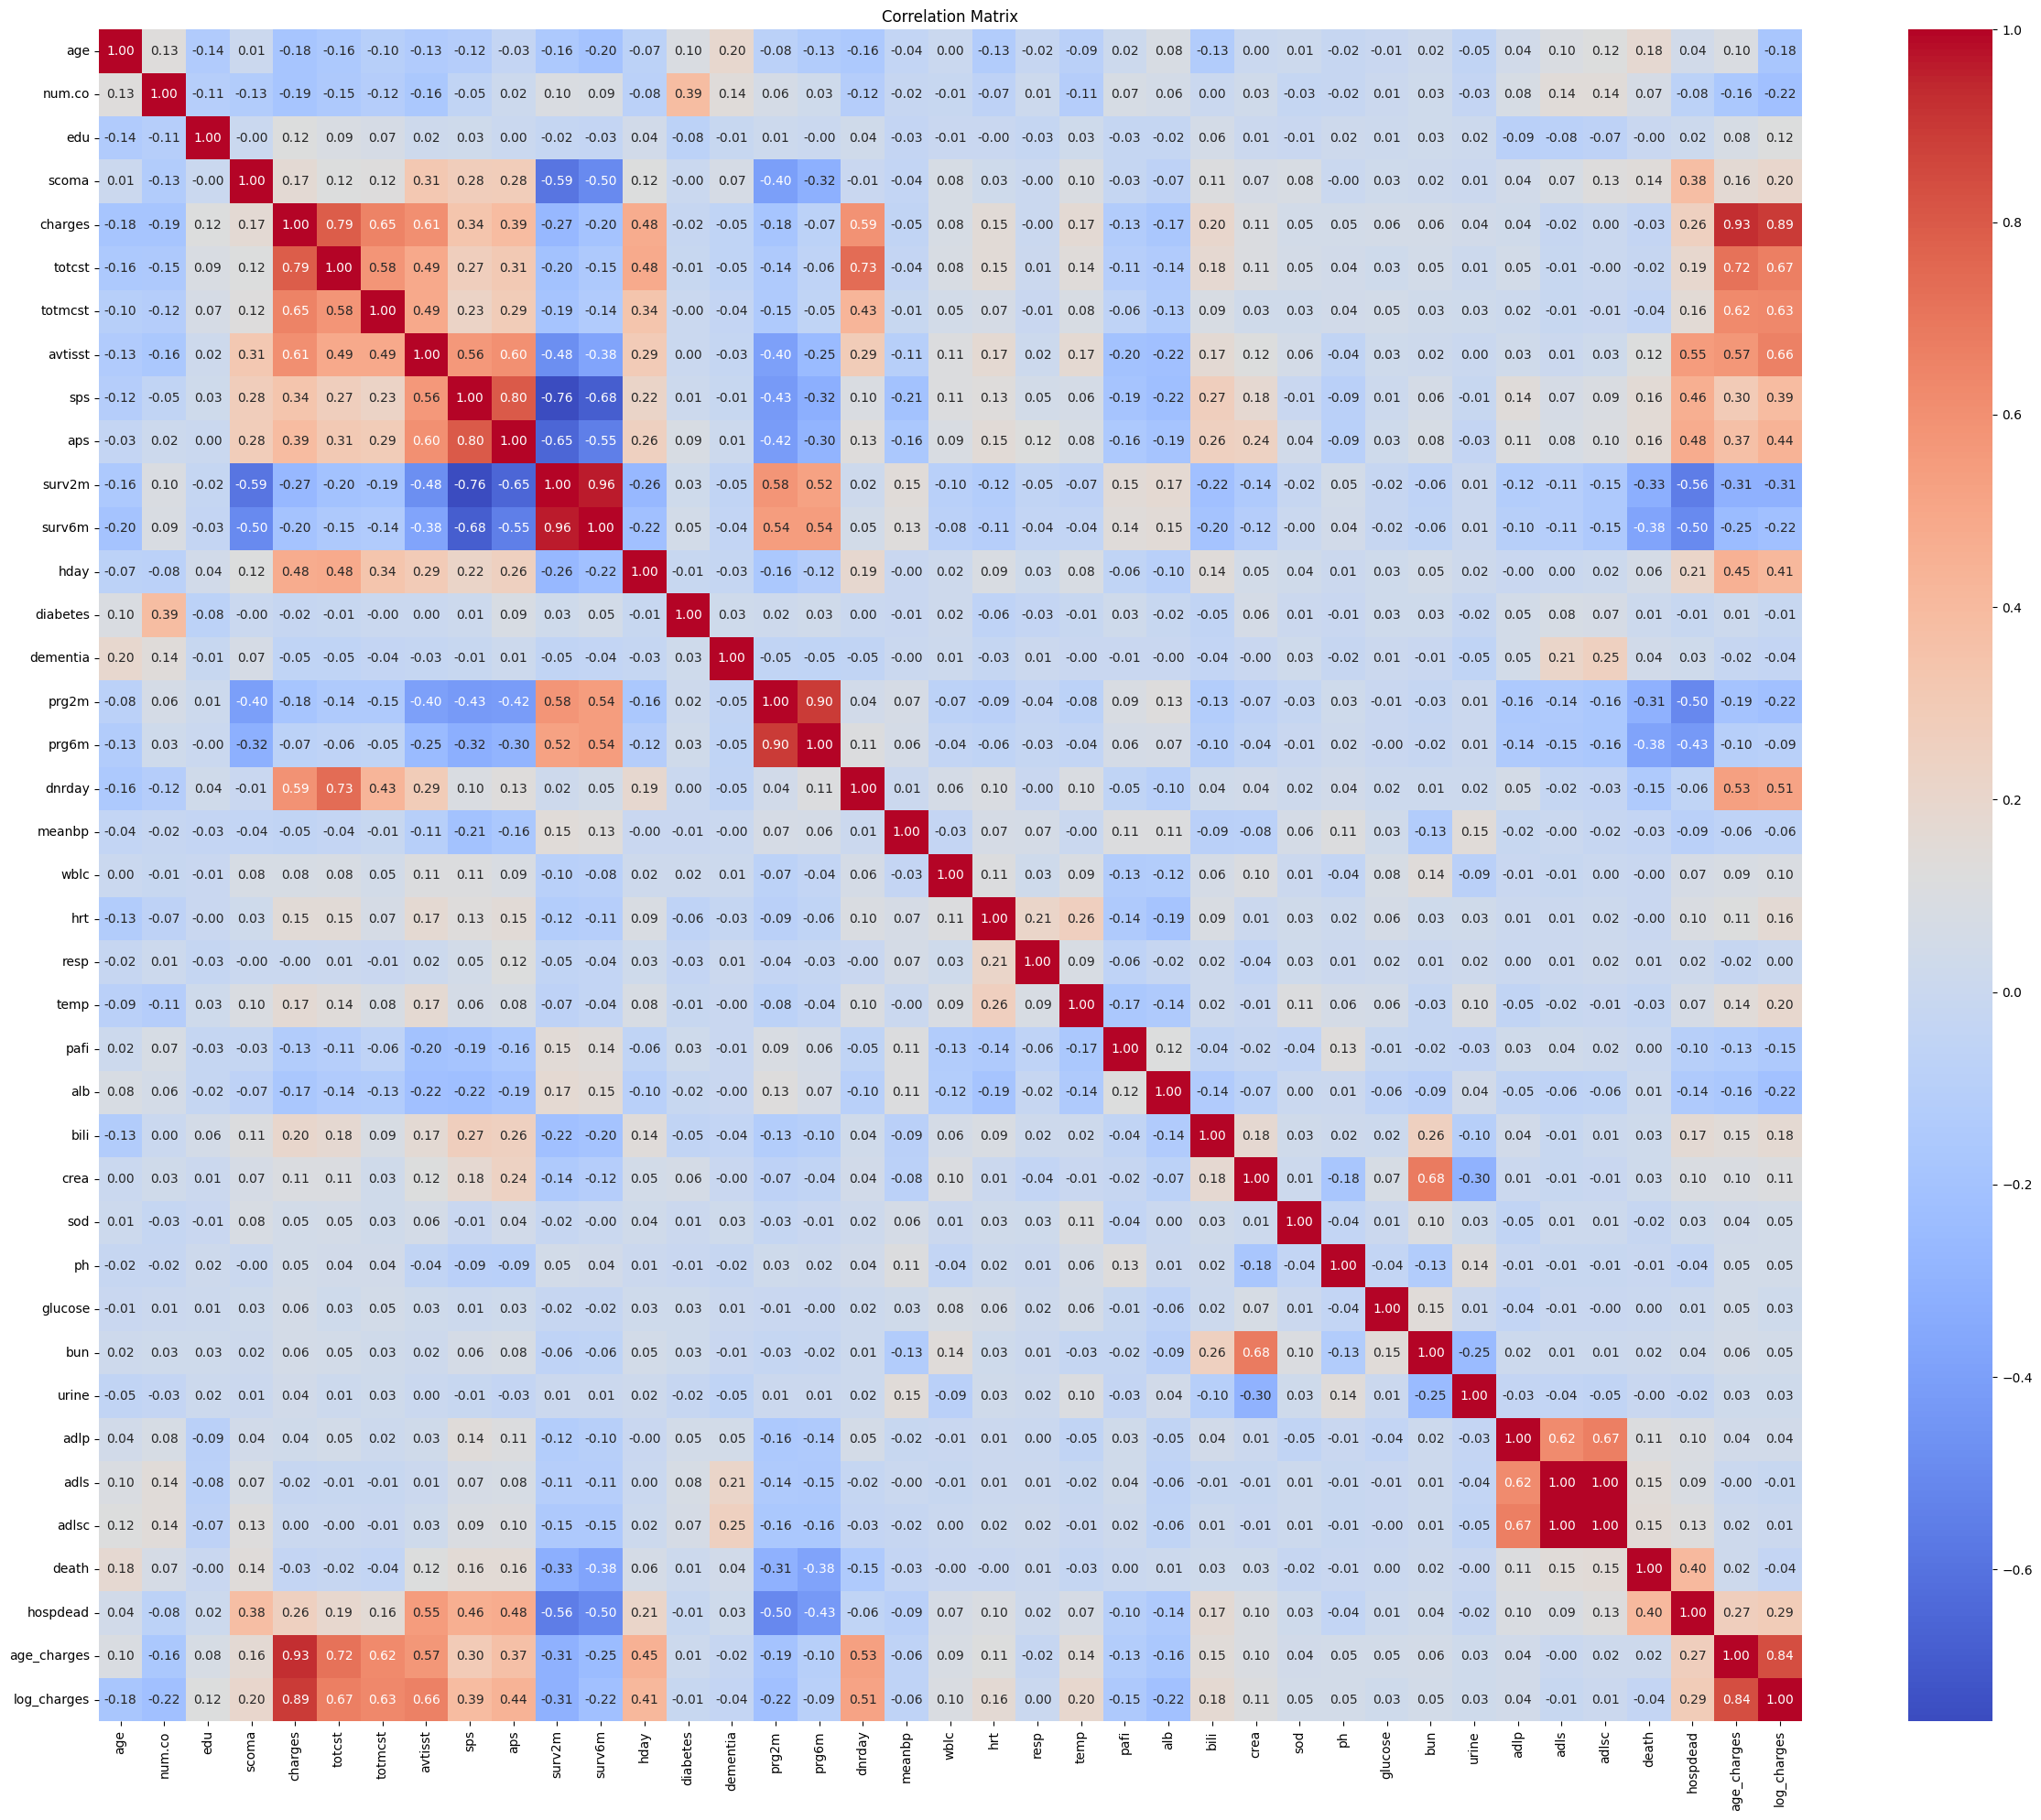

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# ดู Correlation ระหว่างฟีเจอร์ที่เป็นเชิงตัวเลขกับ target 'adlsc'
corr_matrix = df.corr(numeric_only=True) # Only include numerical features for correlation calculation
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# เลือกฟีเจอร์ที่มีความสัมพันธ์สูงสุดกับ target 'adlsc'
features = ['age', 'charges', 'totmcst', 'alb']  # ตัวอย่างฟีเจอร์ที่เลือก

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# ตรวจสอบค่า VIF เพื่อตรวจหา multicollinearity
X = df[features]

# Handle missing values (NaN) by dropping rows with NaN
X = X.dropna()

# Check and handle infinite values (inf)
X = X.replace([np.inf, -np.inf], np.nan) # Replace inf with NaN
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)  # ฟีเจอร์ที่มี VIF สูงกว่า 5 อาจจะต้องพิจารณาเอาออก

   feature       VIF
0      age  8.466408
1  charges  3.258003
2  totmcst  3.409446
3      alb  8.122527


In [40]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

# ลบ outliers ในฟีเจอร์ที่มีความสำคัญ เช่น 'charges'
df = remove_outliers_iqr(df, 'charges')


In [41]:
def cap_outliers(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# จัดการ outliers ในคอลัมน์ที่มีความสำคัญ เช่น 'charges', 'totmcst', 'adlsc'
df = cap_outliers(df, 'charges', factor=1.5)
df = cap_outliers(df, 'totmcst', factor=1.5)
df = cap_outliers(df, 'adlsc', factor=1.5)


<ipython-input-41-4875fd4b3c28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))
<ipython-input-41-4875fd4b3c28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))
<ipython-input-41-4875fd4b3c28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [42]:
# ลบฟีเจอร์ที่มีค่าหายไปมากกว่า 30%
df = df.drop(columns=['income', 'alb', 'bun', 'urine'])

# เติมค่าหายไปด้วยค่า mean สำหรับ numerical data
df['charges'] = df['charges'].fillna(df['charges'].mean())
df['totmcst'] = df['totmcst'].fillna(df['totmcst'].median())

# เติมค่าหายไปสำหรับ categorical data ด้วย mode
df['race'] = df['race'].fillna(df['race'].mode()[0])


In [43]:
# ตรวจสอบว่าคอลัมน์ 'dzgroup' มีอยู่ใน DataFrame หรือไม่
if 'dzgroup' in df.columns:
    # แปลงคอลัมน์ 'dzgroup' ให้เป็นค่าตัวเลขด้วยการใช้ One-Hot Encoding และเพิ่ม prefix
    df = pd.get_dummies(df, columns=['dzgroup'], prefix='dzgroup', drop_first=True)

# แปลงคอลัมน์ที่มีชนิดข้อมูลเป็น object ทั้งหมดให้เป็นตัวเลขด้วย One-Hot Encoding
for col in df.columns:
    if df[col].dtype == 'object':
        # ทำ One-Hot Encoding ให้กับคอลัมน์ที่เป็น object และเพิ่ม prefix
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)


In [44]:
from sklearn.feature_selection import f_regression
import pandas as pd

# เลือกฟีเจอร์ที่มีความสำคัญด้วยการใช้ F-statistics และ P-value
features = df.drop(columns=['adlsc'])  # ลบ target ออก
target = df['adlsc']

# ตรวจสอบ missing values และจัดการ
features.fillna(features.mean(), inplace=True) # หรือใช้ method อื่นๆ เช่น median, mode

# ใช้ f_regression เพื่อคำนวณค่า F-statistic และ p-value
F_values, p_values = f_regression(features, target)

# แสดงผลในรูปแบบ DataFrame เพื่อความสะดวก
feature_selection = pd.DataFrame({
    'Feature': features.columns,
    'F-value': F_values,
    'P-value': p_values
})

# เรียงลำดับฟีเจอร์ตามค่า P-value (น้อยยิ่งดี)
selected_features = feature_selection.sort_values('P-value')
print(selected_features)

                       Feature       F-value        P-value
30                        adls  45530.435681   0.000000e+00
29                        adlp   1300.545891  2.071582e-264
57   sfdm2_no(M2 and SIP pres)    914.466119  1.660685e-190
14                    dementia    621.741368  2.527063e-132
53                  dnr_no dnr    426.973664   1.669835e-92
31                       death    234.245564   3.726859e-52
16                       prg6m    223.144652   8.440858e-50
56   sfdm2_adl>=4 (>=5 if sur)    221.153088   2.234997e-49
10                      surv2m    219.421035   5.213840e-49
15                       prg2m    213.033549   1.187417e-47
11                      surv6m    206.325182   3.173637e-46
1                       num.co    172.432429   5.397543e-39
32                    hospdead    165.121559   1.980163e-37
3                        scoma    133.558562   1.180607e-30
0                          age    125.884187   5.308607e-29
9                          aps    106.91

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# เลือกฟีเจอร์ที่ผ่านการคัดเลือก (ตัวอย่างการเลือกฟีเจอร์ที่มีค่า P-value ต่ำกว่า 0.05)
selected_features_list = selected_features[selected_features['P-value'] < 0.05]['Feature'].tolist()

# แบ่งข้อมูล train/test
X = df[selected_features_list]  # เลือกฟีเจอร์ตามที่ผ่านการคัดเลือก
y = df['adlsc']  # เลือก target ที่ต้องการพยากรณ์

# ตรวจสอบค่า missing และจัดการใน X
X.fillna(X.mean(), inplace=True)  # เติมค่า NaN ด้วยค่าเฉลี่ย (หรือใช้ median, mode ได้)

# แบ่งข้อมูลเป็นชุดฝึก (train) และชุดทดสอบ (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Linear Regression ใหม่
model = LinearRegression()
model.fit(X_train, y_train)  # ฝึกโมเดลด้วยชุดข้อมูลฝึก

# ทำนายผลด้วยชุดข้อมูลทดสอบ
y_pred = model.predict(X_test)

# ประเมินผลลัพธ์
mse = mean_squared_error(y_test, y_pred)  # คำนวณค่า Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)  # คำนวณค่า R-squared

# แสดงผลลัพธ์ MSE และ R-squared
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5155185471560432
R-squared: 0.8764112303744187


<ipython-input-45-0e19e0ecdd9a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # เติมค่า NaN ด้วยค่าเฉลี่ย (หรือใช้ median, mode ได้)


# **Model Building**

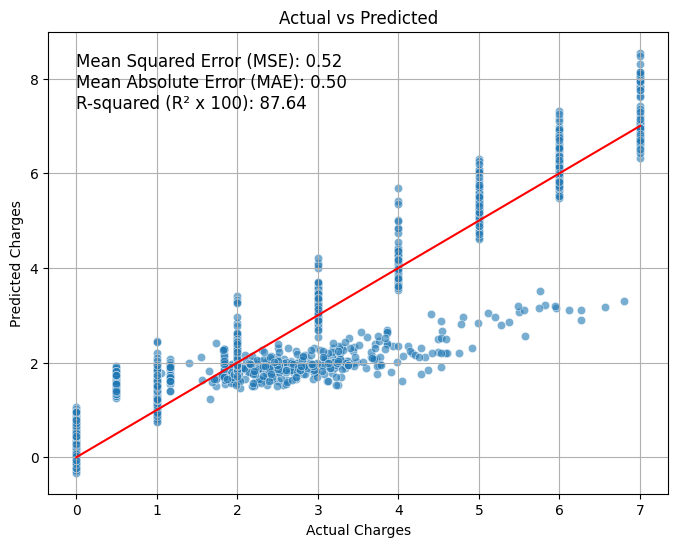

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# สมมติว่า y_test คือค่าจริง และ y_pred คือค่าที่ทำนายโดยโมเดล
# คำนวณ MSE, MAE และ R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# สร้างกราฟ
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # สร้างเส้นแนวทแยงมุม

# แสดงค่า MSE, MAE และ R-squared บนกราฟ
plt.text(x=min(y_test), y=max(y_pred), s=f'Mean Squared Error (MSE): {mse:.2f}\nMean Absolute Error (MAE): {mae:.2f}\nR-squared (R² x 100): {r2 * 100:.2f}', fontsize=12, verticalalignment='top')

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


# Conclution

จากรูปกราฟที่แสดงค่าที่ทำนายได้ (Predicted Charges) เทียบกับค่าจริง (Actual Charges), ค่าที่วัดได้จากการทำนายมีดังนี้:

Mean Squared Error (MSE): 0.52

- MSE คือค่าเฉลี่ยของค่าความคลาดเคลื่อน (error) ที่ยกกำลังสอง ระหว่างค่าจริง (Actual) และค่าทำนาย (Predicted) โดยยิ่งค่าต่ำแสดงว่าความผิดพลาดเฉลี่ยต่ำ ซึ่งในที่นี้ MSE มีค่าเท่ากับ 0.52 หมายถึงโมเดลมีความคลาดเคลื่อนเฉลี่ยในการทำนายค่อนข้างต่ำ แต่เนื่องจากเป็นการยกกำลังสอง ข้อผิดพลาดที่สูงจะถูกขยายมากขึ้น

Mean Absolute Error (MAE): 0.50

- MAE คือค่าเฉลี่ยของความคลาดเคลื่อนแบบสัมบูรณ์ ซึ่งไม่ยกกำลังสอง ดังนั้นข้อผิดพลาดจะไม่ถูกขยายเหมือนใน MSE การตีความก็คือค่า MAE = 0.50 แสดงว่าค่าทำนายของโมเดลมีความคลาดเคลื่อนเฉลี่ยจากค่าจริงประมาณ 0.50 หน่วย ซึ่งเป็นค่าความผิดพลาดที่ค่อนข้างต่ำ

R-squared (R² x 100): 87.64

- R-squared เป็นตัวชี้วัดความแม่นยำของโมเดล ซึ่งบอกว่าโมเดลสามารถอธิบายความแปรปรวนของข้อมูลได้มากน้อยเพียงใด ค่า R² ที่สูงขึ้นหมายถึงโมเดลสามารถอธิบายความแปรปรวนในข้อมูลได้ดีขึ้น ในกรณีนี้ R² = 87.64% แสดงว่าโมเดลสามารถอธิบายความแปรปรวนของข้อมูลได้ถึง 87.64% ซึ่งถือว่าดีมาก ส่วนอีก 12.36% ที่เหลือ โมเดลไม่สามารถอธิบายได้
และจากกราฟสังเกตุเห็นว่าในบางช่วงของค่าจริงที่สูง (4 ถึง 7), โมเดลทำนายค่าได้ต่ำกว่าค่าจริงอย่างเห็นได้ชัด, ซึ่งอาจบ่งบอกถึงความจำเป็นในการปรับปรุงโมเดลเพื่อให้สามารถจัดการกับข้อมูลในช่วงนั้นได้ดีขึ้น
การกระจายของข้อมูลแนะนำว่าอาจมี outliers หรือมีความแปรปรวนสูงในบางส่วนของข้อมูล ซึ่งควรพิจารณาในการวิเคราะห์เพิ่มเติม

สรุปได้ว่าโมเดลมีประสิทธิภาพในการทำนายค่าที่ดีในหลายๆ ช่วง แต่อาจจำเป็นต้องปรับปรุงเพื่อทำนายค่าที่สูงอย่างมีประสิทธิภาพยิ่งขึ้นและการจัดการกับ outliers. การทำงานต่อไปควรรวมถึงการทดสอบและปรับโมเดลให้เหมาะสมกับข้อมูลที่มีความซับซ้อนมากขึ้น.